# IML Assignment 1

## Name: Mukhammadrizo Maribjonov


## Mail: m.maribjonov@innopolis.university


## Group: BS22-R1-01

### Code style policy 

We expect you to follow https://peps.python.org/pep-0008/ Python standart style and will reduce your points if you don't. Also we ask you to comment your code when it's needed (logical blocks, function declaration, loops), however over-documentation is the evil.

Example of nice code style (no need to run this cells):

There are few lines only, but they are represents important logical blocks, thus you should explain what their purpose:

Example of too detailed and meaningless commenting that is not welcome:

Ultimately, we belive in your programming common sense :) The purpose of clear code style is fast and smooth grading of your implementation and checking that you understand ML concepts.

## Task 1

### 3.1. Linear Regression
#### Data reading

In [300]:
import pandas as pd


# Read the CSV file into a DataFrame
df = pd.read_csv('train_1.csv')
df = df.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X_1     200 non-null    float64
 1   X_2     200 non-null    float64
 2   X_3     200 non-null    float64
 3   X_4     200 non-null    float64
 4   y       200 non-null    float64
dtypes: float64(5)
memory usage: 7.9 KB


#### Train\validation splitting

In [301]:
from sklearn.model_selection import train_test_split

X = df.drop('y', axis=1)  # select all columns except 'y' for features
y = df['y']  # select column 'y' for target variable

# Split and shuffle the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

print(X_train, y_train)

Training set shape: (160, 4) (160,)
Validation set shape: (40, 4) (40,)
          X_1       X_2       X_3       X_4
79  -1.507101  0.685065 -1.195848  1.661516
197 -0.862325 -1.020685  2.016208 -2.297696
38  -1.979905 -1.685421  6.471406 -0.874245
24  -0.271208 -2.033052  6.338887 -0.265373
122  1.224786  0.460604 -0.982280 -0.042637
..        ...       ...       ...       ...
106  2.207771  1.761330 -6.248523 -1.386208
14   1.833243  2.476781 -6.643736  1.860258
92   2.271597  0.345551 -1.301237  0.815917
179  0.853249 -2.429690  7.440760  0.521445
102 -2.276478  1.390519 -4.854702  0.535740

[160 rows x 4 columns] 79      -4.707501
197    -38.482399
38    -292.345643
24    -259.757279
122      1.555425
          ...    
106    235.011559
14     289.352387
92       2.102272
179   -404.077950
102    120.507481
Name: y, Length: 160, dtype: float64


#### Linear regression model fitting

In [302]:
from sklearn.linear_model import LinearRegression


# Declare and train a linear regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Prediction by model on the validation set
y_pred_lr = linear_model.predict(X_val)

#### Linear regression model prediction & Evaluation


In [303]:
from sklearn import metrics

def print_metrics(y_actual, y_pred):
    """
    Print Mean Squared Error (MSE), Root Mean Squared Error (RMSE),
    Mean Absolute Error (MAE), and R2 score.

    Parameters:
        y_actual: Actual target labels.
        y_pred: Predicted target labels.
    """
    # Calculate metrics
    mse = metrics.mean_squared_error(y_actual, y_pred)
    rmse = mse**(0.5)
    mae = metrics.mean_absolute_error(y_actual, y_pred)
    r2_score = metrics.r2_score(y_actual, y_pred)

    # Print the metrics
    print("Mean Squared Error (MSE): {:.2f}".format(mse))
    print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
    print("Mean Absolute Error (MAE): {:.2f}".format(mae))
    print("R2 Score: {:.2f}".format(r2_score))


print_metrics(y_val, y_pred_lr)


Mean Squared Error (MSE): 5682.79
Root Mean Squared Error (RMSE): 75.38
Mean Absolute Error (MAE): 62.89
R2 Score: 0.86


### 3. 2 Polynomial Regression
#### Constructing the polynomial regression pipeline

In [304]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [305]:
# Create a polynomial regression pipeline
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('linear_regression', LinearRegression())
])

#### Tuning the degree hyper-parameter using GridSearch

In [306]:
from sklearn.model_selection import GridSearchCV


# Set up parameters for GridSearch
parameters = {
    'poly_features__degree': range(2, 6)
}


# Define GridSearch instance
search = GridSearchCV(pipeline, parameters, cv=8, scoring='neg_mean_squared_error')

# Train the GridSearch
search.fit(X_train, y_train)


# Find the optimum degrees
best_params = search.best_params_
print("Best parameters:", best_params)

# Get the best model
best_model = search.best_estimator_

# Predict on test set
y_pred_poly = best_model.predict(X_val)

# Print the GridSearchCV score
print(f"search score: {search.best_score_}")

Best parameters: {'poly_features__degree': 4}
search score: -0.6207601041379286


In [307]:
print_metrics(y_val, y_pred_poly)

Mean Squared Error (MSE): 0.17
Root Mean Squared Error (RMSE): 0.42
Mean Absolute Error (MAE): 0.32
R2 Score: 1.00


#### Save the model

In [308]:
import pickle

# Save the GridSearch model for evaluation
filename = 'poly_optimized_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

### 3.3 Determine the linear dependent features

Use the following code cell to determine a pair of features from the training dataset that are correlated to each other. Explain your choise in the markdown cell.

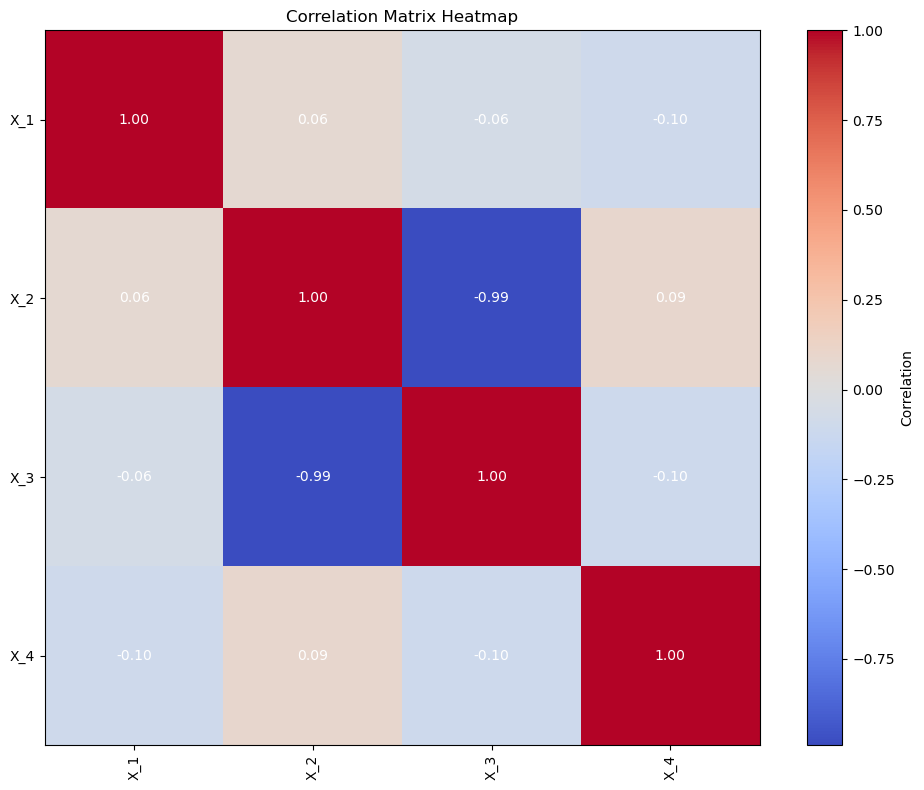

In [309]:
import matplotlib.pyplot as plt

# Convert X_train to a pandas DataFrame if it's not already
df = pd.DataFrame(X_train)

# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Correlation Matrix Heatmap')

# Add annotations
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        plt.text(j, i, "{:.2f}".format(corr_matrix.iloc[i, j]),
                 ha='center', va='center', color='white')
        
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.tight_layout()
plt.show()


A correlation coefficient of -0.99 between $X_2$ and $X_3$ indicates a very strong negative linear relationship between these two variables. This means that as the values of $X_2$ increase, the values of $X_3$ tend to decrease, and vice versa.

## Task 2

### 4.1 Data processing
#### Loading the dataset

In [310]:
import pandas as pd

#### Exploring the dataset  and removing 2 redundant features

In [311]:
# 1. Load the dataset
pokemon_df = pd.read_csv("pokemon_modified.csv")

# 2. Explore the dataset
print(pokemon_df.head())  # Display the first few rows of the dataframe

   against_bug  against_dark  against_dragon  against_electric  against_fairy  \
0          1.0           1.0             1.0               0.5            0.5   
1          1.0           1.0             1.0               0.5            0.5   
2          1.0           1.0             1.0               0.5            0.5   
3          0.5           1.0             1.0               1.0            0.5   
4          0.5           1.0             1.0               1.0            0.5   

   against_fight  against_fire  against_flying  against_ghost  against_grass  \
0            0.5           2.0             2.0            1.0           0.25   
1            0.5           2.0             2.0            1.0           0.25   
2            0.5           2.0             2.0            1.0           0.25   
3            1.0           0.5             1.0            1.0           0.50   
4            1.0           0.5             1.0            1.0           0.50   

   ...  hp        name  percenta

In [312]:
print(pokemon_df.info())  # Display information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

In [313]:
unique_count = pokemon_df['name'].nunique()
print("Number of unique elements in name:", unique_count)

unique_count = pokemon_df['classification'].nunique()
print("Number of unique elements in classification:", unique_count)

Number of unique elements in name: 801
Number of unique elements in classification: 588


From analyzing data, I found that in 'name' column we have 801 unique elements and 588 in 'classificaiton' column. They will not help us in predicting legacy of pokenom, and column 'name', 'classification' are redundant.

In [314]:
# Remove the redundant features
redundant_features = ['name', 'classification']
pokemon_df.drop(redundant_features, axis=1, inplace=True)

#### Splitting the data
Use random_state = 123, stratify, and set test_size = 0.2

In [315]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# Use random_state = 123 to ensure reproducibility
# Use stratify=y to ensure that the class distribution is preserved in both training and testing sets
# Set test_size = 0.2 to split 80% of the data into training set and 20% into testing set
X_train, X_test, y_train, y_test = train_test_split(pokemon_df.drop('is_legendary', axis=1), 
                                                    pokemon_df['is_legendary'], 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=pokemon_df['is_legendary'])

Check if the dataset is balanced or not and comment on it

In [316]:
# Calculate the proportion of each class in the training set
train_class_proportion = y_train.value_counts(normalize=True)
print("Training Set Class Proportion:")
print(train_class_proportion)

# Calculate the proportion of each class in the testing set
test_class_proportion = y_test.value_counts(normalize=True)
print("\nTesting Set Class Proportion:")
print(test_class_proportion)


Training Set Class Proportion:
0    0.9125
1    0.0875
Name: is_legendary, dtype: float64

Testing Set Class Proportion:
0    0.913043
1    0.086957
Name: is_legendary, dtype: float64


The class proportions in both sets are similar, with the majority class (non-legendary) comprising around 91% of the dataset, while the minority class (legendary) comprises around 9%. Since the proportions are roughly balanced and similar between the training and testing sets, we can consider the dataset to be relatively balanced for the classification task.

#### Checking for missing values

In [317]:
# Loop through each column and count missing values
for column in pokemon_df.columns:
    missing_count = pokemon_df[column].isnull().sum()
    if missing_count > 0:
        print(f"Column '{column}' has {missing_count} missing values.")

Column 'height_m' has 20 missing values.
Column 'percentage_male' has 98 missing values.
Column 'weight_kg' has 20 missing values.


#### Impute the missing values

In [318]:
from sklearn.impute import SimpleImputer


# Instantiate the SimpleImputer with mean strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer to the training data
imputer.fit(X_train)

# Transform the training and testing data
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Convert the imputed arrays back to DataFrame if needed
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X_test.columns)
X_train = X_train_imputed_df
X_test = X_test_imputed_df


#### Double check that there are no missing values

In [319]:
# Check if there are any missing values after imputation
print("Missing values in training set after imputation:", X_train_imputed_df.isnull().sum().sum())
print("Missing values in testing set after imputation:", X_test_imputed_df.isnull().sum().sum())

Missing values in training set after imputation: 0
Missing values in testing set after imputation: 0


#### Encode categorically

In [320]:
from sklearn.preprocessing import OneHotEncoder

# one-hot-encode categorical features
def ohe_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    # create dataframe from encoded features with named columns
    new_cols = pd.DataFrame(new_feats, columns=encoder.get_feature_names_out(features_name))
    new_df = pd.concat([df, new_cols], axis=1)    
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df

encoder = OneHotEncoder(sparse=False, drop='first')
categorical_columns = ['type1']

encoder.fit(X_train[categorical_columns])

print(len(X_train), len(y_train))

X_train = ohe_new_features(X_train, categorical_columns, encoder)

print(len(X_train), len(y_train))

X_test = ohe_new_features(X_test, categorical_columns, encoder)

640 640
640 640


/home/rizo/anaconda3/envs/dl/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Scale the data

In [321]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler



# Define a scaler instance from one of the above
scaler = MinMaxScaler()
scaler.fit(X_train)

# Apply the scaler on both train and test features
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

#### <span style="color:red">Correlation matrix</span>

Are there highly co-related features in the dataset? Is it a problem? Explain in the markdown cell.

/tmp/ipykernel_180314/310668149.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = pokemon_df.corr()


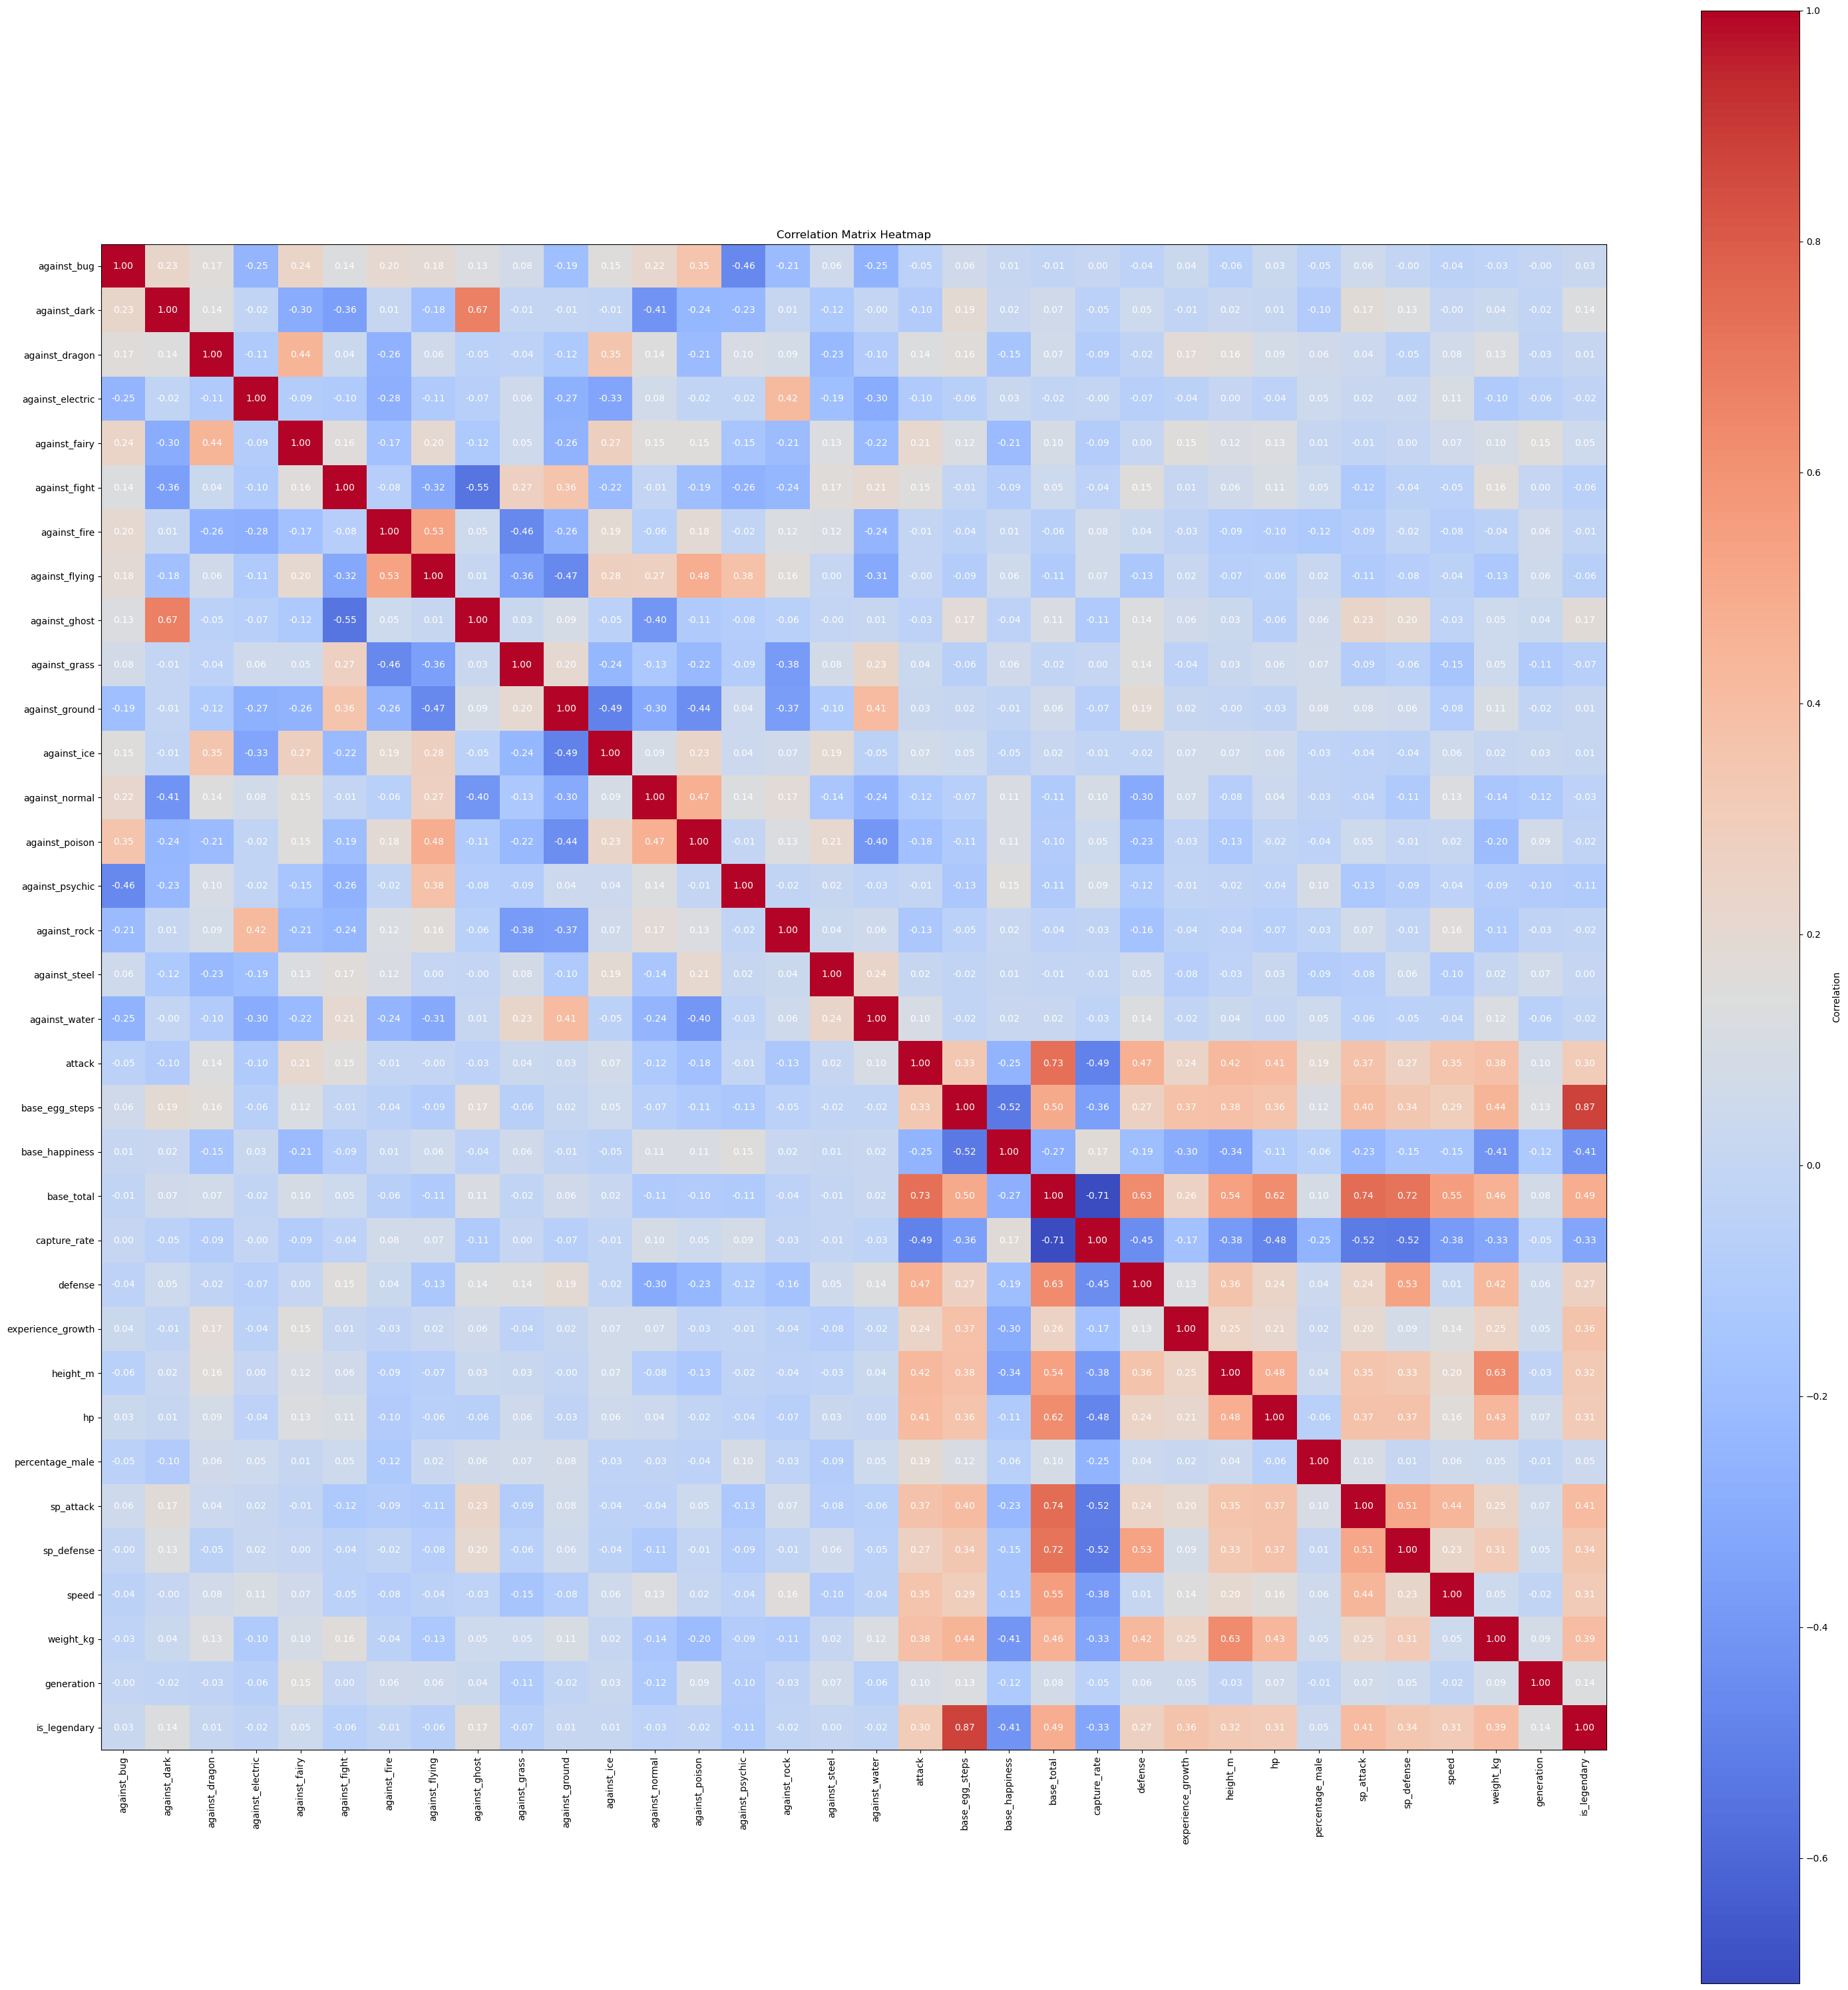

In [322]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))


# Compute the correlation matrix
corr_matrix = pokemon_df.corr()

# Create a heatmap using matplotlib
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Correlation Matrix Heatmap')

# Add annotations
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        plt.text(j, i, "{:.2f}".format(corr_matrix.iloc[i, j]),
                 ha='center', va='center', color='white')

plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.tight_layout()
plt.show()


Yes, there are some highly correlated features, like capture_rate and base_total, capture_rate and attack, base_total and sp_attack, base_total and sp_defence.
Highly correlated features may contain redundant information, which does not add additional predictive power to the model but increases computational complexity.
In some cases, high correlation between features can lead to overfitting, especially in models that are sensitive to multicollinearity, such as linear regression. The model may learn noise or spurious patterns from the highly correlated features.

### 4.2 Model fitting and Comparison

#### Tuning LR model

In [323]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_clf_metrics(y_actual, y_pred):
    """
    Caclulate and print classification metrics: accuracy, precision, recall, and F1 score 

    Parameters:
        y_actual: Actual target labels.
        y_pred: Predicted target labels.
    """
    accuracy = accuracy_score(y_actual, y_pred)
    precision = precision_score(y_actual, y_pred)
    recall = recall_score(y_actual, y_pred)
    f1 = f1_score(y_actual, y_pred)

    # Print classification metrics
    print("Classification Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

In [324]:
# Define the parameter grid to search
parameters = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-3, 3, 7),
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

In [326]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Declare and train logistic regression inside GridSearchCV with the parameters above
# Set max_iter=1000 in LR constructor
# Define the logistic regression model
lr = LogisticRegression(max_iter=1000)

# Create GridSearchCV instance with logistic regression classifier
lr_clf_gs = GridSearchCV(lr, parameters, scoring='f1', cv=5)

# Fit the GridSearchCV to the training data
lr_clf_gs.fit(X_train, y_train)

/home/rizo/anaconda3/envs/dl/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/home/rizo/anaconda3/envs/dl/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/rizo/anaconda3/envs/dl/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/rizo/anaconda3/

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='f1')

In [327]:
print("Tuned Hyperparameters :", lr_clf_gs.best_params_)
print("Accuracy:", lr_clf_gs.best_score_)

Tuned Hyperparameters : {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.9339047619047619


#### Construct a LR with the best params and Evaluate the LR with the best params

In [336]:
# Construct a logistic regression model with the best params
lr_clf = LogisticRegression(**lr_clf_gs.best_params_, max_iter=1000)

# Fit the logistic regression model to the training data
lr_clf.fit(X_train, y_train)

# Predict on the test set with the best model
lr_y_pred = lr_clf.predict(X_test)


In [337]:
print_clf_metrics(y_test, lr_y_pred)

Classification Metrics:
Accuracy: 0.9938
Precision: 0.9333
Recall: 1.0000
F1 Score: 0.9655


#### Print the top 5 most influencing features and the top 5 ignored features

In [338]:
# Print the top 5 most influencing features and the top 5 ignored features
coefficients = lr_clf_gs.best_estimator_.coef_[0]
feature_names = X_train.columns

In [339]:
print("Top 5 Most Influencing Features:")
for feature, coef in sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True)[:5]:
    print(f"{feature}: {coef}")

Top 5 Most Influencing Features:
base_egg_steps: 13.51119204657583
capture_rate: -10.602877063949622
type1_normal: -9.626459044432812
base_total: 7.446940315048003
experience_growth: 6.919944054091012


In [340]:
print("\nTop 5 Ignored Features:")
for feature, coef in sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]))[:5]:
    print(f"{feature}: {coef}")


Top 5 Ignored Features:
against_bug: 0.0
against_dark: 0.0
against_electric: 0.0
against_fairy: 0.0
against_fire: 0.0


#### Tuning KNN model

In [341]:
from sklearn.neighbors import KNeighborsClassifier

# Declare and train knn inside GridSearchCV
param_grid = {
    'n_neighbors': list(range(1, 15)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'cosine']
}

# Create GridSearchCV instance with KNN classifier
knn_clf_gs = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV to the training data
knn_clf_gs.fit(X_train, y_train)


# Print the best hyperparameters and accuracy
print("Tuned Hyperparameters:", knn_clf_gs.best_params_)
print("Accuracy:", knn_clf_gs.best_score_)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fb2a6cc1800>
Traceback (most recent call last):
  File "/home/rizo/anaconda3/envs/dl/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/rizo/anaconda3/envs/dl/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/rizo/anaconda3/envs/dl/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/rizo/anaconda3/envs/dl/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'None

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fb2a6cc14e0>
Traceback (most recent call last):
  File "/home/rizo/anaconda3/envs/dl/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/rizo/anaconda3/envs/dl/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/rizo/anaconda3/envs/dl/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/rizo/anaconda3/envs/dl/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'None

Tuned Hyperparameters: {'metric': 'cosine', 'n_neighbors': 1, 'weights': 'uniform'}
Accuracy: 0.95


#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [342]:
# Construct a KNN model with the best params
best_knn_clf = KNeighborsClassifier(**knn_clf_gs.best_params_)

# Fit the KNN model to the training data
best_knn_clf.fit(X_train, y_train)


# Predict on the test set with the best model
knn_y_pred = best_knn_clf.predict(X_test)

# Print classification metrics
print_clf_metrics(y_test, knn_y_pred)

Classification Metrics:
Accuracy: 0.9752
Precision: 1.0000
Recall: 0.7143
F1 Score: 0.8333


#### Fitting GNB to the data and evaluating on the test dataset

In [346]:
from sklearn.naive_bayes import GaussianNB

# Declare and train Gaussian Naive-Bayes
gauss_nb_clf = GaussianNB()
gauss_nb_clf.fit(X_train, y_train)

# Predict on the test set
gauss_y_pred = gauss_nb_clf.predict(X_test)

# Print classification metrics
print("Classification Metrics for Gaussian Naive-Bayes:")
print_clf_metrics(y_test, gauss_y_pred)

Classification Metrics for Gaussian Naive-Bayes:
Classification Metrics:
Accuracy: 0.9317
Precision: 0.5600
Recall: 1.0000
F1 Score: 0.7179


#### Which metric is most appropriate for this task and why?

For this taks, I think, we can use F1. But let's analyze first, why we can't use other metrics:
1. Accuracy is used when the classes in the dataset are balanced. In out case classes are not balanced, or even not close to balance.
2. Precision when false positives are costly. In real life it is not cistly, I think, guessing non-legendary pokemon as legendary. (I am not fan of pokemons, I never played it. Hope fans of pokemons are not angry with me XD)
3. Recall is when false negatives are costly. In real life it is not cistly, I think, guessing legendary pokemon as non-legendary. (I am not fan of pokemons, I never played it. Hope fans of pokemons are not angry with me XD)
4. F1: when both precision and recall are important, the F1 score is often used.

#### Compare the 3 classifiers in terms of accuracy, precision, recall and F1-score.
What is the best model for this task? Explain

Logistic Regression achieves the highest accuracy, precision, recall, and F1-score among the three classifiers. It correctly identifies legendary pokemons with high accuracy and captures all relevant instances (recall=1.0000), resulting in a balanced F1-score of 0.9655.

## 5. Bonus Task

#### Loading the Dataset

In [ ]:
import pandas as pd

# TODO Write your code here
train_data = ...

test_data = ...

In [ ]:
# Split the data
# TODO Write your code here
X_train, X_test, y_train, y_test = ...
print(X_train, y_train, X_test, y_test)

####  Plot the data using the pairplot in sns

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# TODO Write your code here

#### Fit LR to the training dataset using OVR and evaluate on the test dataset

In [ ]:
# TODO Write your code here
ovr_lr = ...

#### Fit LR to the training dataset using multinomial and evaluate on the test dataset


In [ ]:
# TODO Write your code here
multi_lr = ...

#### Using gridsearch to tune the C value and multi class

In [ ]:
# TODO Write your code here
params = ...
grid_search_clf = ...

In [ ]:
print("Tuned Hyperparameters :")
print("Accuracy :")

#### Comment on why one multi_class technique was better than the other

#### Create LR with the best params

In [ ]:
# TODO Write your code here
multi_lr = ... 

#### Visualize the decision boundaries

In [ ]:
from mlxtend.plotting import plot_decision_regions
# TODO Write your code here
multi_lr = ...

plot_decision_regions()

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression decision boundary)
plt.show()

#### Comment on the decision boundary, do you think this is a good model or not? and based on what?